In [1]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
  Using cached statsmodels-0.14.4.tar.gz (20.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for statsmodels: filename=statsmodels-0.14.4-cp310-cp310-linux_s390x.whl size=25921948 sha256=22d824259092862a8c2b290312fd40cc21fd28c17cb8c7de4767d967007a73c2
  Stored in directory: /home/jovyan/.cache/pip/wheels/a5/6b/26/c07108a2ba47d11c8fb175f4be8c401765bb073a4e5fb98272
Successfully built statsmodels
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.2
    Uninstalling patsy-0.5.2:
      Successfully uninstalled patsy-0.5.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
import warnings

In [3]:
# Suppress warnings
warnings.filterwarnings("ignore")
register_matplotlib_converters()

In [5]:
# Load the dataset
data = pd.read_csv('pre_data.csv')

In [6]:
print(data.head())

         Date  Organization_ID  Energy_Consumption_kWh  Temperature_C  \
0  2021-01-01                7                 1173.57           36.3   
1  2021-01-02                4                  812.70           17.4   
2  2021-01-03                8                  824.89           29.4   
3  2021-01-04                5                 1040.92           13.1   
4  2021-01-05                7                  879.47           17.0   

   Humidity_%  Wind_Speed_kmh  Precipitation_mm Weather_Condition  
0          78            17.7              10.0            Cloudy  
1          21             6.7               2.0            Cloudy  
2          95             8.1               0.0             Snowy  
3          29            11.4               0.0             Sunny  
4          63             3.5               0.0             Rainy  


In [7]:
# Preprocessing: Convert Date to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [8]:
# Select the 'Energy_Consumption_kWh' column for ARIMA model
energy_data = data['Energy_Consumption_kWh']

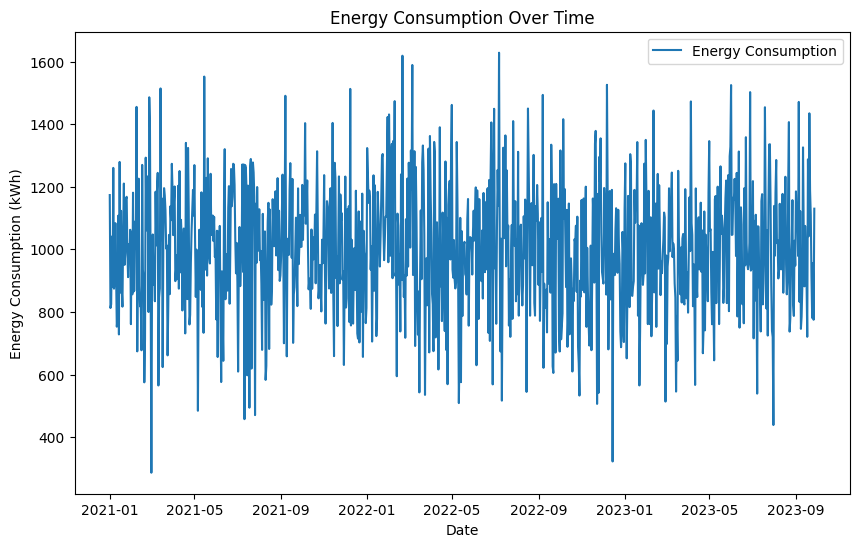

In [9]:
# Plot the original data to visualize the time series
plt.figure(figsize=(10,6))
plt.plot(energy_data, label='Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()

In [10]:
# Fit the ARIMA model (Auto Regressive Integrated Moving Average)
model = ARIMA(energy_data, order=(5,1,0))  # order(p,d,q) = (5,1,0) for example
model_fit = model.fit()

In [11]:
# Predict the next 30 days (for instance)
forecast = model_fit.forecast(steps=30)

In [12]:
# Display the forecasted values
forecast

2023-09-28    954.117531
2023-09-29    915.063320
2023-09-30    922.849027
2023-10-01    948.553868
2023-10-02    935.843924
2023-10-03    965.126306
2023-10-04    942.086346
2023-10-05    938.363274
2023-10-06    942.559289
2023-10-07    945.753323
2023-10-08    944.243671
2023-10-09    946.187385
2023-10-10    943.506749
2023-10-11    943.464489
2023-10-12    944.294093
2023-10-13    944.569914
2023-10-14    944.299346
2023-10-15    944.391505
2023-10-16    944.130922
2023-10-17    944.190581
2023-10-18    944.306926
2023-10-19    944.311436
2023-10-20    944.265447
2023-10-21    944.269571
2023-10-22    944.250708
2023-10-23    944.264471
2023-10-24    944.276740
2023-10-25    944.272744
2023-10-26    944.266377
2023-10-27    944.267395
Freq: D, Name: predicted_mean, dtype: float64

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [14]:
# Step 1: Split the data into train and test sets
train_size = int(len(energy_data) * 0.8)  # 80% for training, 20% for testing
train, test = energy_data[:train_size], energy_data[train_size:]

In [15]:
# Step 2: Fit the ARIMA model on the training data
model = ARIMA(train, order=(5,1,0))  # Adjust (p,d,q) order as needed
model_fit = model.fit()

In [16]:
# Step 3: Make predictions on the test set
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

In [17]:
# Step 4: Calculate accuracy metrics
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

In [18]:
# Display the accuracy metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 166.7685193737262
Mean Squared Error (MSE): 43002.57312551448
Root Mean Squared Error (RMSE): 207.37061779701213


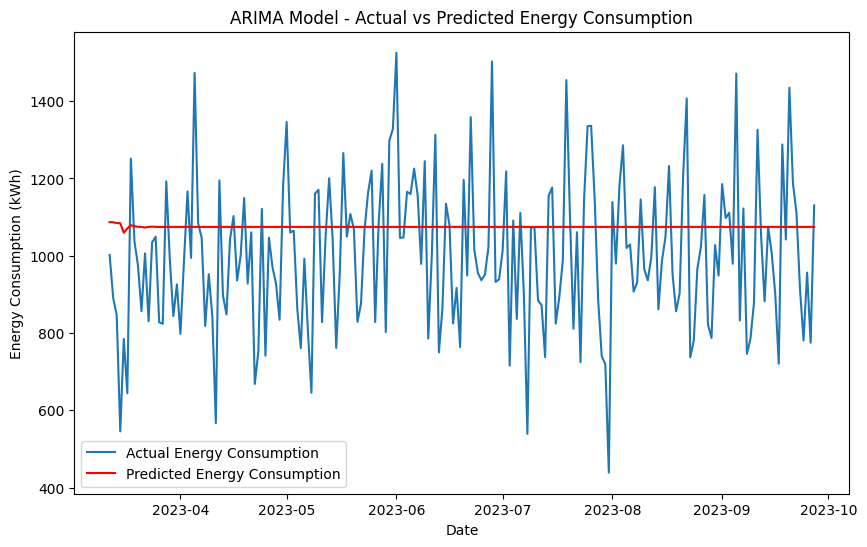

In [19]:
# Step 5: Plot the predictions vs actual values for visualization
plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='Actual Energy Consumption')
plt.plot(test.index, predictions, label='Predicted Energy Consumption', color='red')
plt.title('ARIMA Model - Actual vs Predicted Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()

In [20]:
# Step 6: Forecast future values (if needed)
forecast = model_fit.forecast(steps=30)  # Forecast the next 30 days
print(forecast)

2023-03-12    1086.886649
2023-03-13    1086.489538
2023-03-14    1084.567913
2023-03-15    1083.856394
2023-03-16    1059.462779
2023-03-17    1070.482039
2023-03-18    1079.034101
2023-03-19    1076.441669
2023-03-20    1074.720230
2023-03-21    1074.490097
2023-03-22    1072.883994
2023-03-23    1074.595531
2023-03-24    1075.293866
2023-03-25    1074.638839
2023-03-26    1074.396456
2023-03-27    1074.469488
2023-03-28    1074.414655
2023-03-29    1074.605119
2023-03-30    1074.623448
2023-03-31    1074.520490
2023-04-01    1074.507650
2023-04-02    1074.533360
2023-04-03    1074.534464
2023-04-04    1074.548998
2023-04-05    1074.543907
2023-04-06    1074.532194
2023-04-07    1074.534163
2023-04-08    1074.538564
2023-04-09    1074.538318
2023-04-10    1074.538771
Freq: D, Name: predicted_mean, dtype: float64


In [21]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test - predictions) / test)) * 100

# Calculate accuracy as 100% - MAPE
accuracy = 100 - mape

# Display the accuracy
print(f'MAPE: {mape}%')
print(f'Accuracy: {accuracy}%')


MAPE: 18.97429111333984%
Accuracy: 81.02570888666015%
